In [1]:
import numpy as np
from network import *
from GNAR import *
import matplotlib.pyplot as plt
from TVGNAR import *

[0.0091585  0.02002431]


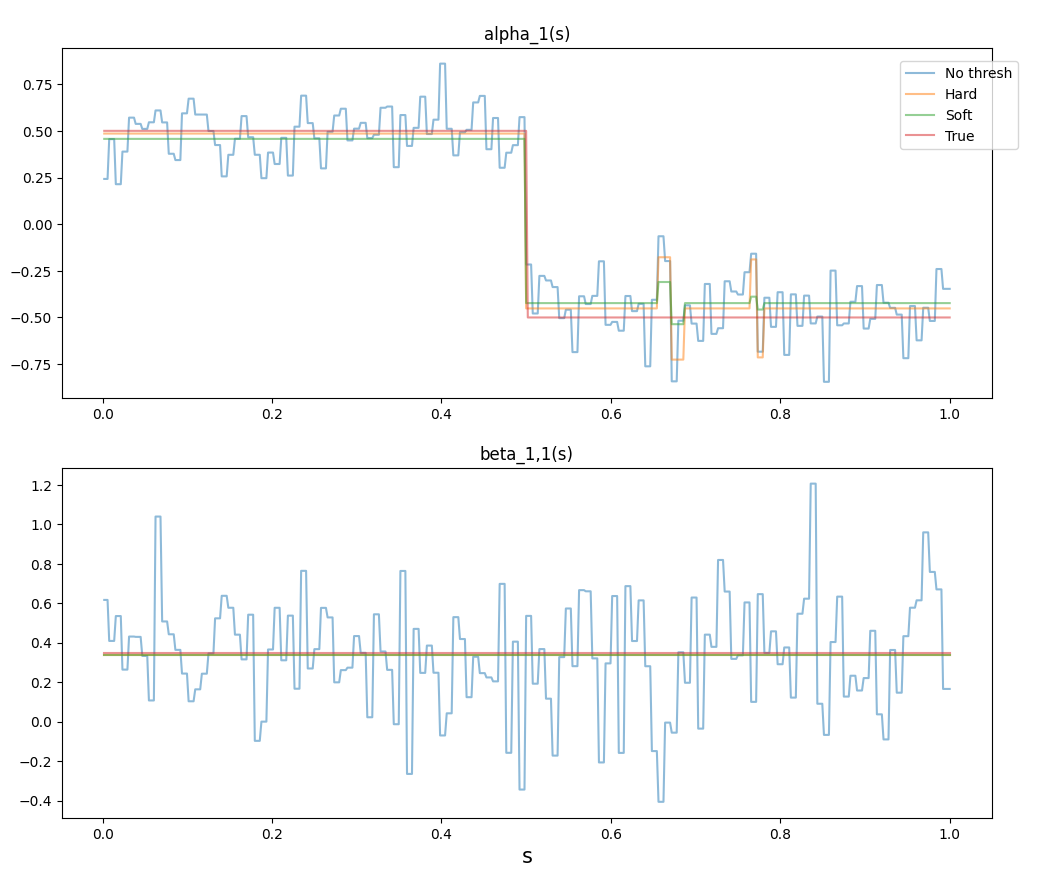

In [2]:
#Simulation 1
T = 512
b=T
random.seed(1)
network = random_network(10)

def alpha_fun(t):
    t = t/T
    return np.select([t<=0.5,t>0.5],[0.5,-0.5])

def beta_fun(t):
    return np.ones_like(t)*0.35

coefs = np.zeros((T+b+1,2))
coefs[:,0] = alpha_fun(np.arange(-b,T+1))
coefs[:,1] = beta_fun(np.arange(-b,T+1))

np.random.seed(1)
vts_sim = TVGNAR_sim(network, 1, [1], coefs, intercept=False, global_intercept=True, error_cov_mat=.1*np.identity(network.size),length=T+1,burn_in=b)

g_tv_h = TVGNAR(1,[1],intercept=False,family="haar")
g_tv_h.fit(network,vts_sim,thresh=None)

g_tv_h_h = TVGNAR(1,[1],intercept=False,family="haar")
g_tv_h_h.fit(network,vts_sim,thresh="hard",mad_level=1)
print(g_tv_h_h.mad)

g_tv_h_s = TVGNAR(1,[1],intercept=False,family="haar")
g_tv_h_s.fit(network,vts_sim,thresh="soft",mad_level=1)

fig, axs = plt.subplots(2,figsize=(12,10))
#fig.suptitle('Estimation of alpha_1,beta_1,1 with haar wavelet and different thresholding')
for i in range(2):
    axs[i].plot(np.arange(1,T+1)/T,g_tv_h.get_coefs()[:,i],label="No thresh",alpha=0.5)
    axs[i].plot(np.arange(1,T+1)/T,g_tv_h_h.get_coefs()[:,i],label="Hard",alpha=0.5)
    axs[i].plot(np.arange(1,T+1)/T,g_tv_h_s.get_coefs()[:,i],label="Soft",alpha=0.5)
    axs[i].plot(np.arange(1,T+1)/T,coefs[b+1:,i],label="True",alpha=0.5)
handles, labels = axs[-1].get_legend_handles_labels()
axs[0].title.set_text('alpha_1(s)')
axs[1].title.set_text('beta_1,1(s)')
axs[1].set_xlabel("s",fontsize=15)
fig.legend(handles, labels, loc=(0.85,0.83))

In [4]:
#Simulation 2
T = 1000
b=T
random.seed(1)
network = tridiagonal_network(32)

def alpha_fun(t):
    return np.cos(t/(T)*2*np.pi)**2/2

def beta_2_fun(t):
    return -np.tanh((t/(T)-0.5)*2*np.pi)**2/2+np.cos(t/(T)*4*np.pi-np.pi)/5+1/2

def beta_fun(t):
    return np.sin(t/(T)*2*np.pi)**(3)*0.5

def const_fun(t):
    return np.ones_like(t)

coefs = np.zeros((T+b+1,3))
coefs[:,0] = alpha_fun(np.arange(-b,T+1))
coefs[:,1] = beta_fun(np.arange(-b,T+1))
coefs[:,2] = const_fun(np.arange(-b,T+1))

np.random.seed(1)
vts_sim = TVGNAR_sim(network, 1, [1], coefs, intercept=True, global_intercept=True, error_cov_mat=0.1*np.identity(network.size),length=T+1,burn_in=b)
np.savetxt("vts_sim.txt",vts_sim)

g_tv_h_s = TVGNAR(1,[1],intercept=True,global_intercept=True,family="haar",gpu=True)
g_tv_h_s.fit(network,vts_sim,thresh="soft",mad_level=1)

g_tv = GNAR(1,[1],intercept=True)
g_tv.fit(network,vts_sim)

g_tv_db2_s = TVGNAR(1,[1],intercept=True,global_intercept=True,family="db2",basis_order_min=2)
g_tv_db2_s.fit(network,vts_sim,thresh="soft",mad_level=1)

g_tv_db4_s = TVGNAR(1,[1],intercept=True,global_intercept=True,family="db4",basis_order_min=3)
g_tv_db4_s.fit(network,vts_sim,thresh="soft",mad_level=1)


fig, axs = plt.subplots(2,figsize=(10,10))
#fig.suptitle('alpha_t,beta_t,drift_t with db4 and different thresholding')
for i in range(2):
    axs[i].plot(np.arange(1,T+1)/T,g_tv_h_s.get_coefs()[:,i],label="haar soft",alpha=0.5)
    axs[i].plot(np.arange(1,T+1)/T,g_tv_db2_s.get_coefs()[:,i],label="db2 soft",alpha=0.5)
    axs[i].plot(np.arange(1,T+1)/T,g_tv_db4_s.get_coefs()[:,i],label="db4 soft",alpha=0.5)
    axs[i].plot(np.arange(1,T+1)/T,coefs[b+1:,i],label="True",alpha=0.5)
axs[0].title.set_text('alpha_1(s)')
axs[1].title.set_text('beta_1,1(s)')
axs[1].set_xlabel("s",fontsize=15)
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.8,0.6))

NameError: name 'torch' is not defined